In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print("No of passengers"+str(len(titanic_data)))

No of passengers891


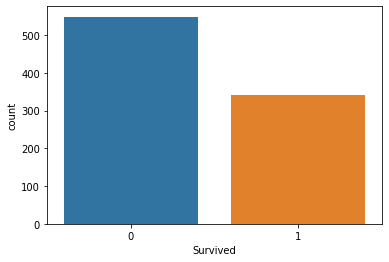

In [ ]:
sns.countplot(x="Survived", data=titanic_data)

#Comparing the gender

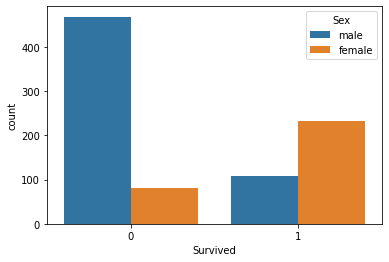

In [ ]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

###Keeping hue as passenger class


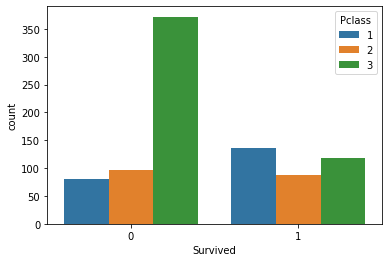

In [ ]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

###plotting a histogram


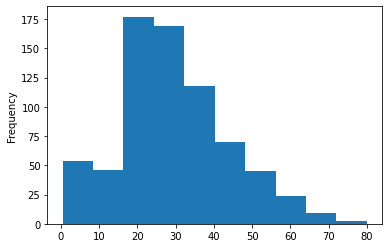

In [ ]:
titanic_data["Age"].plot.hist()

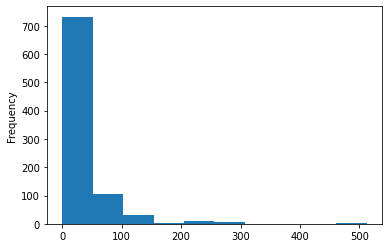

In [ ]:
titanic_data["Fare"].plot.hist()

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


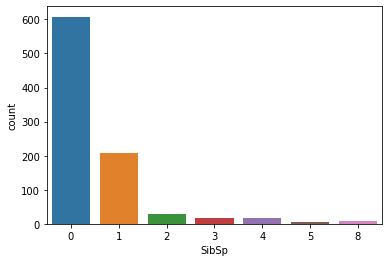

In [ ]:
sns.countplot(x="SibSp", data=titanic_data)

###DATA WRANGLING

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

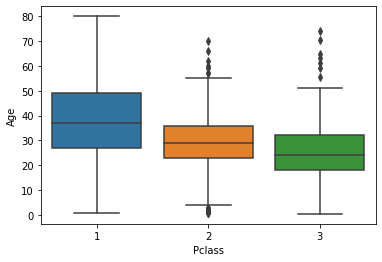

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.drop("Cabin", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
titanic_data.dropna(inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

###CONVERTING TO CATEGORICAL VARIABLE TO PERFORM LOGISTIC REGRESSIOn

In [ ]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
print(sex)

     male
1       0
3       0
6       1
10      0
11      0
..    ...
871     0
872     1
879     0
887     0
889     1

[183 rows x 1 columns]


In [ ]:
embarked=pd.get_dummies(titanic_data['Embarked'])
print(embarked)

     C  Q  S
1    1  0  0
3    0  0  1
6    0  0  1
10   0  0  1
11   0  0  1
..  .. .. ..
871  0  0  1
872  0  0  1
879  1  0  0
887  0  0  1
889  1  0  0

[183 rows x 3 columns]


In [ ]:
pcls=pd.get_dummies(titanic_data['Pclass'])
print(pcls)

     1  2  3
1    1  0  0
3    1  0  0
6    1  0  0
10   0  0  1
11   1  0  0
..  .. .. ..
871  1  0  0
872  1  0  0
879  1  0  0
887  1  0  0
889  1  0  0

[183 rows x 3 columns]


###COCATENATING THESE WITH DATASET

In [ ]:
titanic_data=pd.concat([titanic_data,sex,embarked,pcls], axis=1)

In [ ]:
print(titanic_data)

     PassengerId  Survived  Pclass  ...  1  2  3
1              2         1       1  ...  1  0  0
3              4         1       1  ...  1  0  0
6              7         0       1  ...  1  0  0
10            11         1       3  ...  0  0  1
11            12         1       1  ...  1  0  0
..           ...       ...     ...  ... .. .. ..
871          872         1       1  ...  1  0  0
872          873         0       1  ...  1  0  0
879          880         1       1  ...  1  0  0
887          888         1       1  ...  1  0  0
889          890         1       1  ...  1  0  0

[183 rows x 19 columns]


###DROPPING THE ORIGINAL THREE COLUMNS

In [ ]:
titanic_data.drop("Embarked", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q,S,1,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1,0,0,1,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,0,0,0,1,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,0,0,0,1,1,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,1,0,0,1,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,1,1,0,0


In [ ]:
titanic_data.drop("Sex", axis=1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,1,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1,0,0,1,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,0,0,0,1,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,S,0,0,0,1,1,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,0,1,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,C,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,0,1,1,0,0


In [ ]:
titanic_data.drop("Pclass", axis=1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,1,2,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,0
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,1,1,0,0
10,11,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,0,1,0,0,1
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0,0,1,1,0,0
872,873,0,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,0,1,1,0,0
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,1,0,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1,1,0,0


In [ ]:
titanic_data.drop("PassengerId", axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,1,2,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,1,1,0,0
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,0,1,0,0,1
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0,0,0,1,1,0,0
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,0,1,1,0,0
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0,1,0,0,1,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1,1,0,0


In [ ]:
titanic_data.drop("Name", axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S,1,2,3
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,1,0,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,1,0,0,1,1,0,0
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,0,1,0,0,1
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,0,0,0,1,1,0,0
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,1,0,0,1,1,0,0
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,0,1,0,0,1,0,0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,0,0,0,1,1,0,0


In [ ]:
titanic_data.drop("Ticket", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,C,Q,S,1,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,0,0,1,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,1,0,0,1,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,0,0,0,1,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,D35,S,0,0,0,1,1,0,0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,B51 B53 B55,S,1,0,0,1,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C50,C,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,0,0,1,1,0,0


###SPLITTING INTO TRAINING AND TEST DATA

In [ ]:
y=titanic_data["Survived"]
x=titanic_data.drop("Survived", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(x_train, y_train)

ValueError: ignored